In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Circular CNN 1D

In [3]:
n_in = 6
kernel_size = 3
padding_mode = 'circular'
conv_layer = torch.nn.Conv1d(1, 1, kernel_size, padding=kernel_size//2, padding_mode=padding_mode, bias=False)
# in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None

Set easier weights and input vector for easy visualisation

In [4]:
conv_layer.weight = torch.nn.Parameter(torch.ones_like(conv_layer.weight))

In [5]:
x = torch.linspace(0, n_in - 1, n_in).reshape(1, 1, n_in)

In [6]:
y = conv_layer(x)
print(f"{x.shape=}, {y.shape=}")

x.shape=torch.Size([1, 1, 6]), y.shape=torch.Size([1, 1, 6])


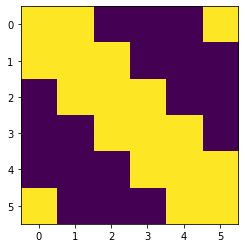

In [7]:
conv_matrix = torch.zeros((n_in, n_in))
for i in range(n_in):
    conv_matrix[i, i % n_in] = 1.0
    for j in range(kernel_size):
        conv_matrix[i, (i+j - kernel_size//2) % n_in] = 1.0
plt.imshow(conv_matrix)

In [8]:
(conv_matrix @ x.squeeze() == y).all()

tensor(True)

In [9]:
print(x)
print(y)

tensor([[[0., 1., 2., 3., 4., 5.]]])
tensor([[[ 6.,  3.,  6.,  9., 12.,  9.]]], grad_fn=<SqueezeBackward1>)


## Self Attention Layer

In [10]:
embed_dim = 1

In [11]:
attention_layer = torch.nn.MultiheadAttention(embed_dim=embed_dim, num_heads=1)